<a href="https://colab.research.google.com/github/tienduongftu/Learn-Algorithmic-Trading/blob/master/Money_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://aiai.soict.ai/dong-tien-thi-truong.html

## Install Env

In [2]:
#@title Load VN Stock Data {display-mode: "form"}

!curl -fsSLO https://raw.githubusercontent.com/algo-stocks/data/master/data/zipline.py
%run -i zipline.py


In [3]:
#@title Import Library
from data import get_pricing, StocksVN

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [8]:
#@title Process Data
tickers = StocksVN()[['name','exchange','industry','sector']] # ,'MarketCap'

vdaily = None
values = None
for ticker in tickers.index:
    price = get_pricing(ticker, start_date='2015-01-01')

    value = (price.open+price.high+price.low+price.close)*price.volume*price.unadjusted/price.close/4e6
    daily = value.to_frame(name='value').assign(ticker=ticker).reset_index()
    value = value.resample('M').mean().to_frame(name='value').assign(ticker=ticker).reset_index()
    if values is None:
        vdaily = daily
        values = value
    else:
        vdaily = vdaily.append(daily)
        values = values.append(value)

mf = tickers.join(values.set_index('ticker')).reset_index()
mfd = tickers.join(vdaily.set_index('ticker')).reset_index()

In [5]:
tickers = StocksVN()[['name','exchange','industry','sector']] # ,'MarketCap'
tickers


,name,exchange,industry,sector
ticker,,,,
A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng
AAA,Công ty cổ phần Nhựa An Phát Xanh,HOSE,Công nghiệp tổng hợp,Hàng hóa và dịch vụ công nghiệp
AAM,Công ty Cổ phần Thủy sản Mekong,HOSE,Sản xuất thực phẩm,Thực phẩm & Đồ uống
AAS,Công ty Cổ phần Chứng khoán SmartInvest,UPCOM,Dịch vụ tài chính,Dịch vụ tài chính
AAT,Công ty cổ phần Tiên Sơn Thanh Hoá,HOSE,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng
...,...,...,...,...
XMD,Công ty Cổ phần Xuân Mai - Đạo Tú,UPCOM,Xây dựng & Vật liệu,Xây dựng & Vật liệu
XMP,Công ty cổ phần thủy điện Xuân Minh,UPCOM,Dụng cụ điện & Điện tử,Hàng hóa và dịch vụ công nghiệp
XPH,Công ty Cổ phần Xà phòng Hà Nội,UPCOM,Hóa chất,Hóa chất


In [7]:
tickers.to_csv('tickers.csv')

In [9]:
mf

,ticker,name,exchange,industry,sector,date,value
0,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-10-31,NaN
1,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-11-30,0.032000
2,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-12-31,0.020740
3,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2019-01-31,0.003200
4,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2019-02-28,0.002467
...,...,...,...,...,...,...,...
107919,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-04-30,0.516288
107920,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-05-31,1.268845
107921,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-06-30,1.748613
107922,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-07-31,1.377934


In [10]:
mfd

,ticker,name,exchange,industry,sector,date,value
0,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-10-23,NaN
1,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-11-29,0.032000
2,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-12-03,0.003200
3,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-12-04,0.056000
4,A32,Công ty cổ phần 32,UPCOM,Hàng hóa cá nhân,Đồ dùng cá nhân và đồ gia dụng,2018-12-21,0.003020
...,...,...,...,...,...,...,...
1621328,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-08-21,1.491008
1621329,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-08-22,0.794475
1621330,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-08-23,1.160325
1621331,YEG,Công ty cổ phần Tập đoàn Yeah1,HOSE,Truyền thông,Phương tiện truyền thông,2023-08-24,0.594090


In [11]:
vdaily


,date,value,ticker
0,2018-10-23,NaN,A32
1,2018-11-29,0.032000,A32
2,2018-12-03,0.003200,A32
3,2018-12-04,0.056000,A32
4,2018-12-21,0.003020,A32
...,...,...,...
1290,2023-08-21,1.491008,YEG
1291,2023-08-22,0.794475,YEG
1292,2023-08-23,1.160325,YEG
1293,2023-08-24,0.594090,YEG


In [12]:
values

,date,value,ticker
0,2018-10-31,NaN,A32
1,2018-11-30,0.032000,A32
2,2018-12-31,0.020740,A32
3,2019-01-31,0.003200,A32
4,2019-02-28,0.002467,A32
...,...,...,...
58,2023-04-30,0.516288,YEG
59,2023-05-31,1.268845,YEG
60,2023-06-30,1.748613,YEG
61,2023-07-31,1.377934,YEG


## Daily

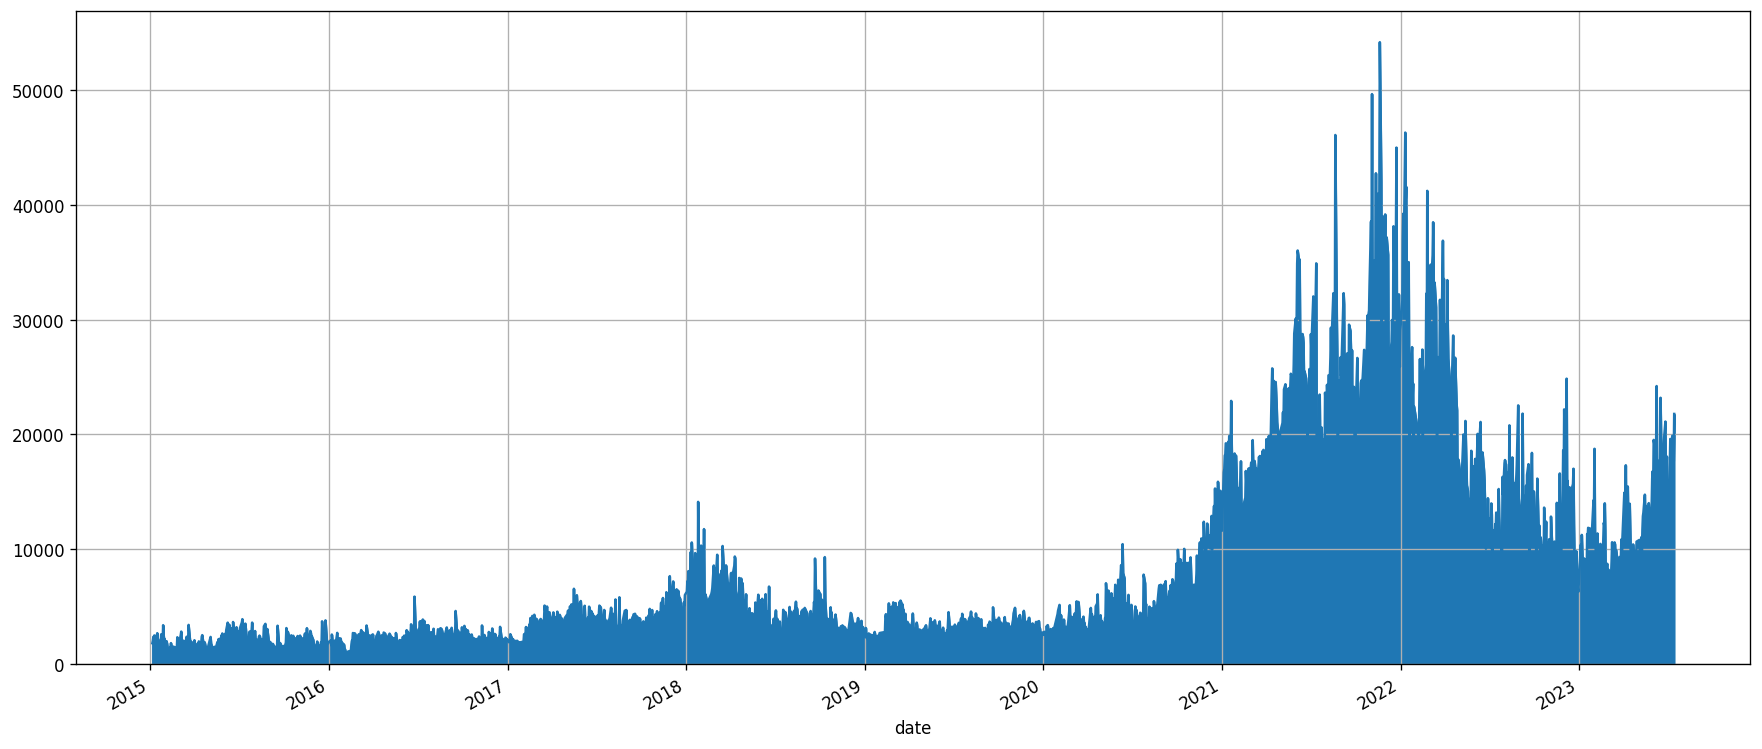

In [ ]:
#@title Overview
rd = mfd.groupby(['industry', 'date']).sum()
rd = pd.pivot_table(rd, values='value', index=['date'], columns=['industry'], aggfunc=np.sum, fill_value=0)
rds = rd.sum(axis=1)
rds.plot.area()
plt.grid(True)

## Analysis

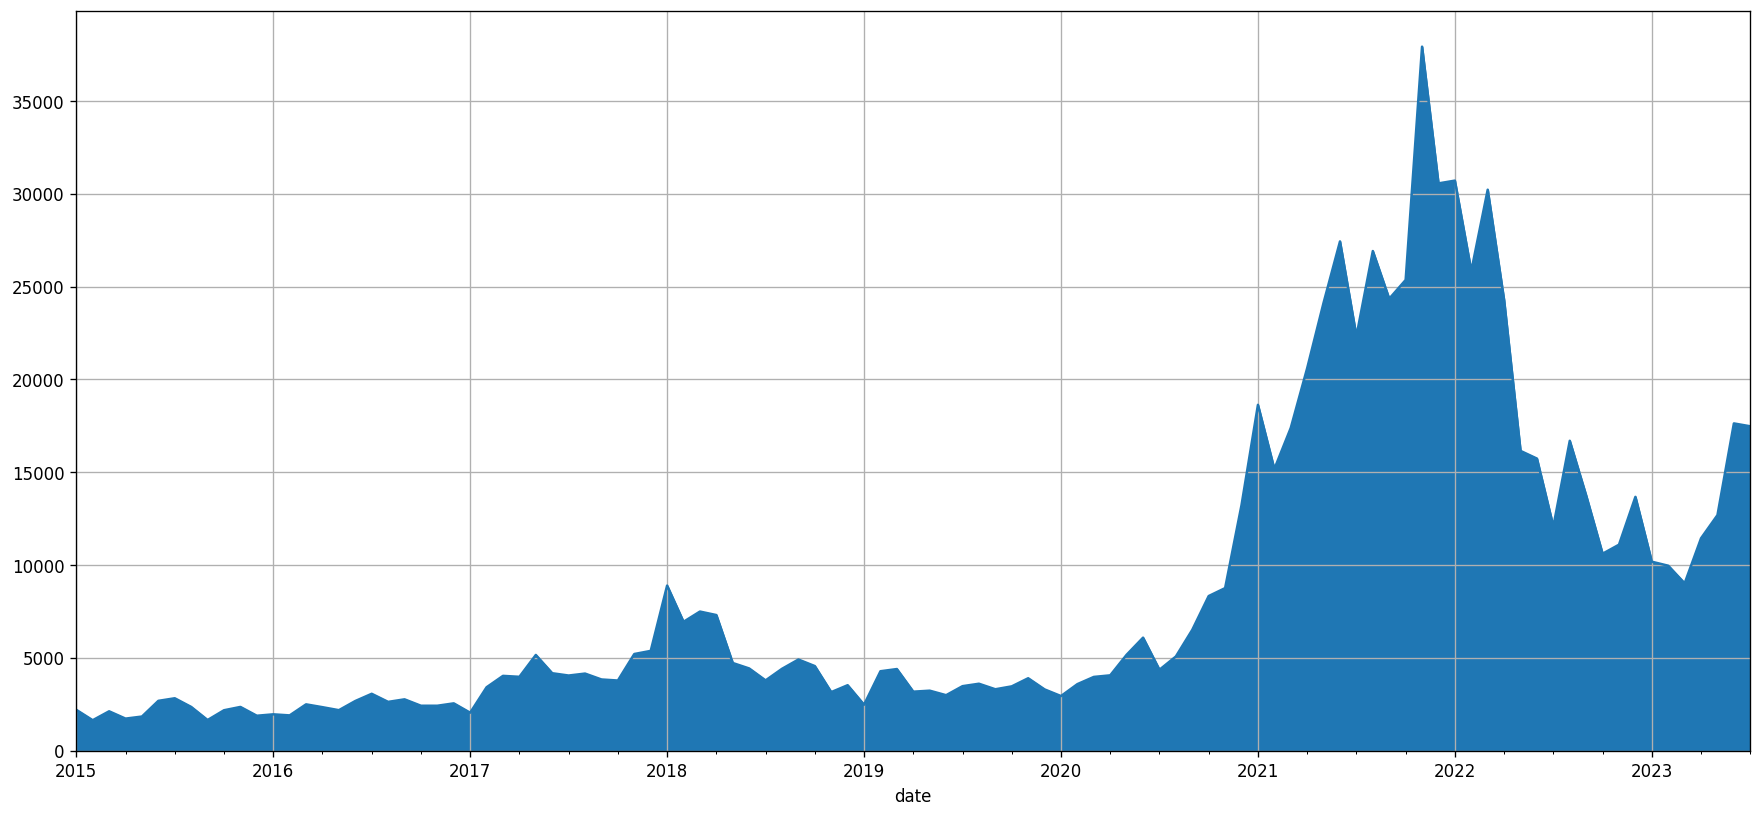

In [ ]:
#@title Overall Market

r = mf.groupby(['industry', 'date']).sum()
r = pd.pivot_table(r, values='value', index=['date'], columns=['industry'], aggfunc=np.sum, fill_value=0)
rs= r.sum(axis=1)
rs.plot.area()
r = r.div(rs, axis=0)
plt.grid(True)

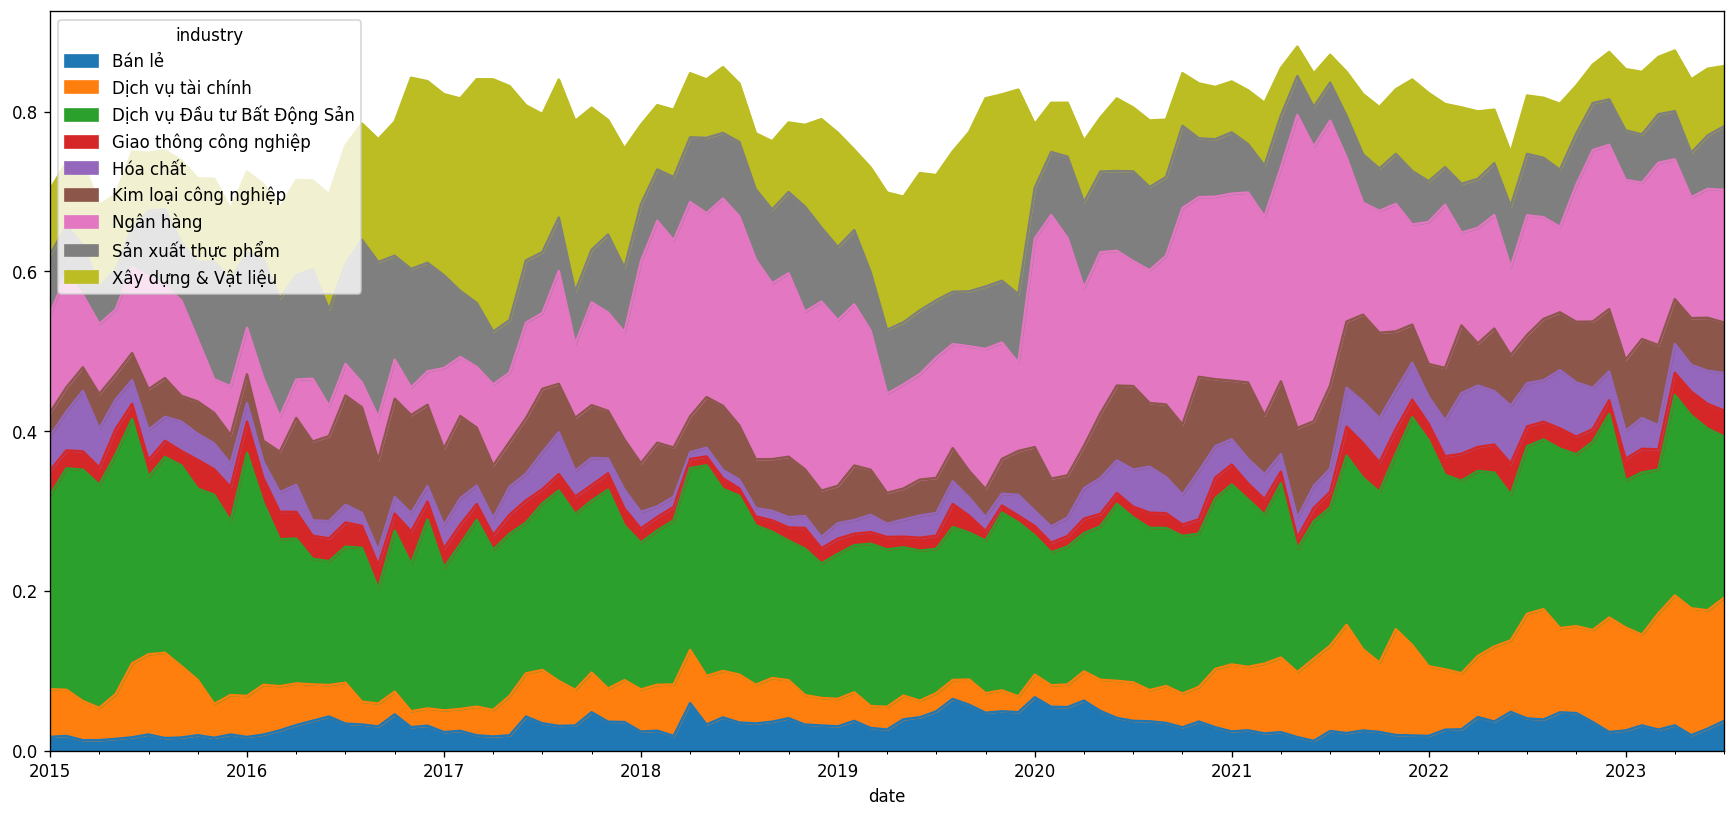

In [ ]:
#@title By Industry
rf= r[r.columns[r.iloc[-1] > 0.03]]
rf.plot.area();

In [ ]:
rf['2018':]

industry,Bán lẻ,Dịch vụ tài chính,Dịch vụ Đầu tư Bất Động Sản,Giao thông công nghiệp,Hóa chất,Kim loại công nghiệp,Ngân hàng,Sản xuất thực phẩm,Xây dựng & Vật liệu
date,,,,,,,,,
2018-01-31,0.023862,0.052699,0.183964,0.017522,0.020900,0.061000,0.252545,0.071395,0.099529
2018-02-28,0.024908,0.057544,0.193275,0.016865,0.013263,0.079662,0.277850,0.064257,0.080617
2018-03-31,0.018357,0.064424,0.205738,0.016735,0.012508,0.061772,0.259414,0.079157,0.084320
2018-04-30,0.059492,0.066627,0.227471,0.011540,0.008510,0.044824,0.268381,0.081060,0.080348
2018-05-31,0.032637,0.060980,0.263624,0.011138,0.010869,0.063440,0.230204,0.094372,0.073232
...,...,...,...,...,...,...,...,...,...
2023-03-31,0.026291,0.145539,0.180050,0.025317,0.030039,0.100478,0.228346,0.060788,0.071722
2023-04-30,0.031641,0.162620,0.250948,0.027870,0.036133,0.056023,0.175170,0.060255,0.075999
2023-05-31,0.019354,0.158840,0.241599,0.029727,0.033537,0.058477,0.151365,0.055636,0.092015


In [ ]:
sector = "Dịch vụ tài chính" # Bất động sản, Ngân hàng, Tài nguyên

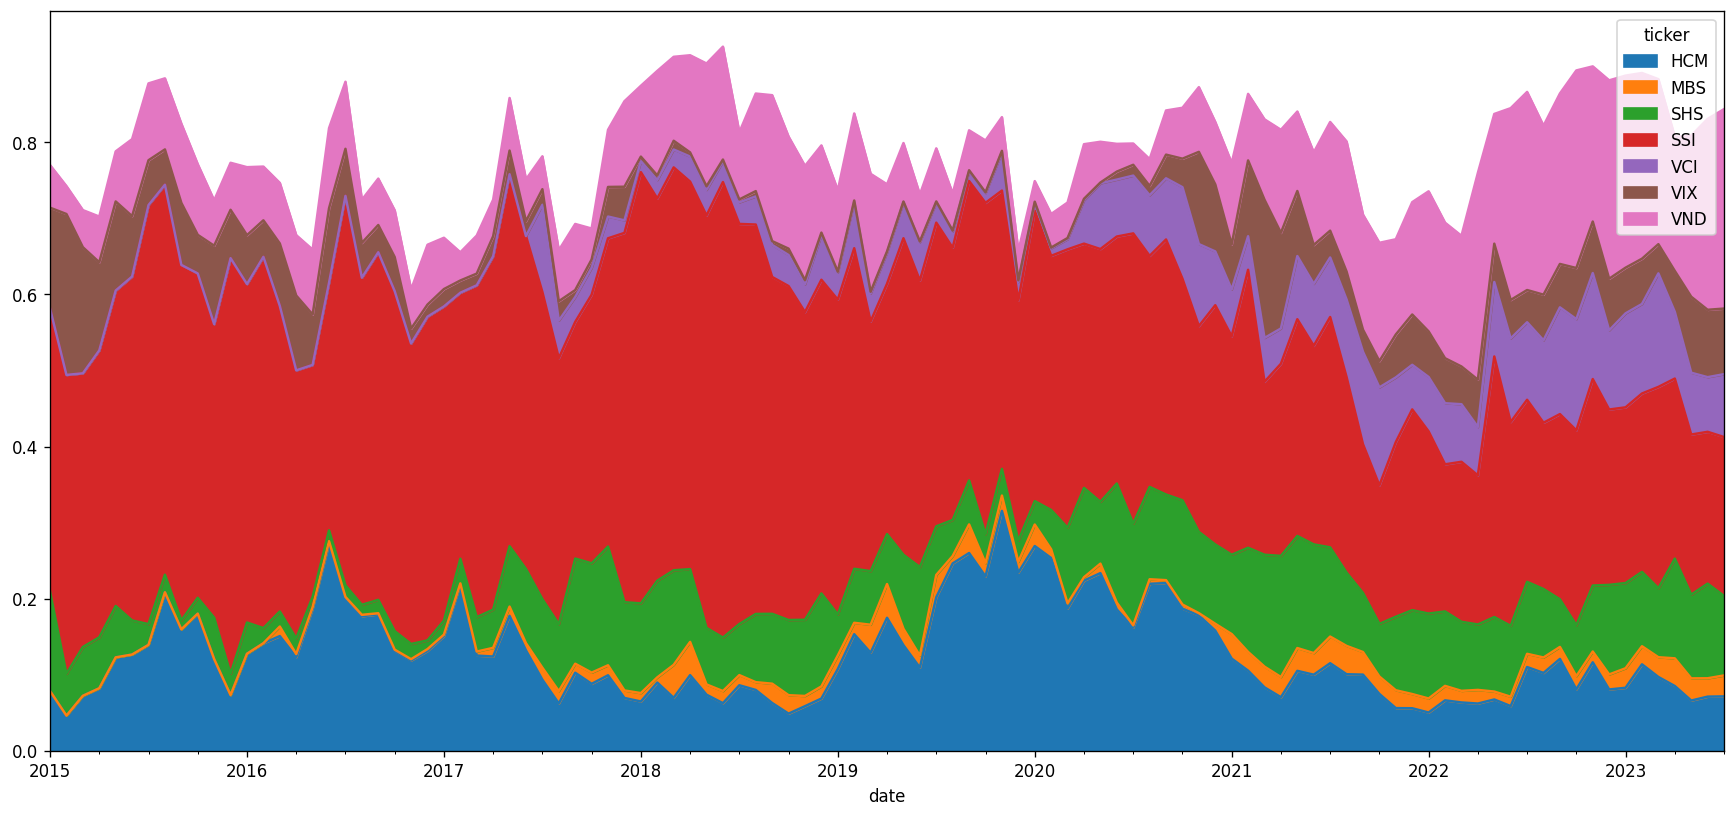

In [ ]:
#@title By Ticker

r = mf[mf.sector == sector].groupby(['ticker', 'date']).sum()
r = pd.pivot_table(r, values='value', index=['date'], columns=['ticker'], aggfunc=np.sum, fill_value=0)
r = r.div(r.sum(axis=1), axis=0)

rf= r[r.columns[r.iloc[-1] > 0.02]]
#rf = r
rf.plot.area();

In [ ]:
sector = "Ngân hàng" # Bất động sản, Ngân hàng, Tài nguyên

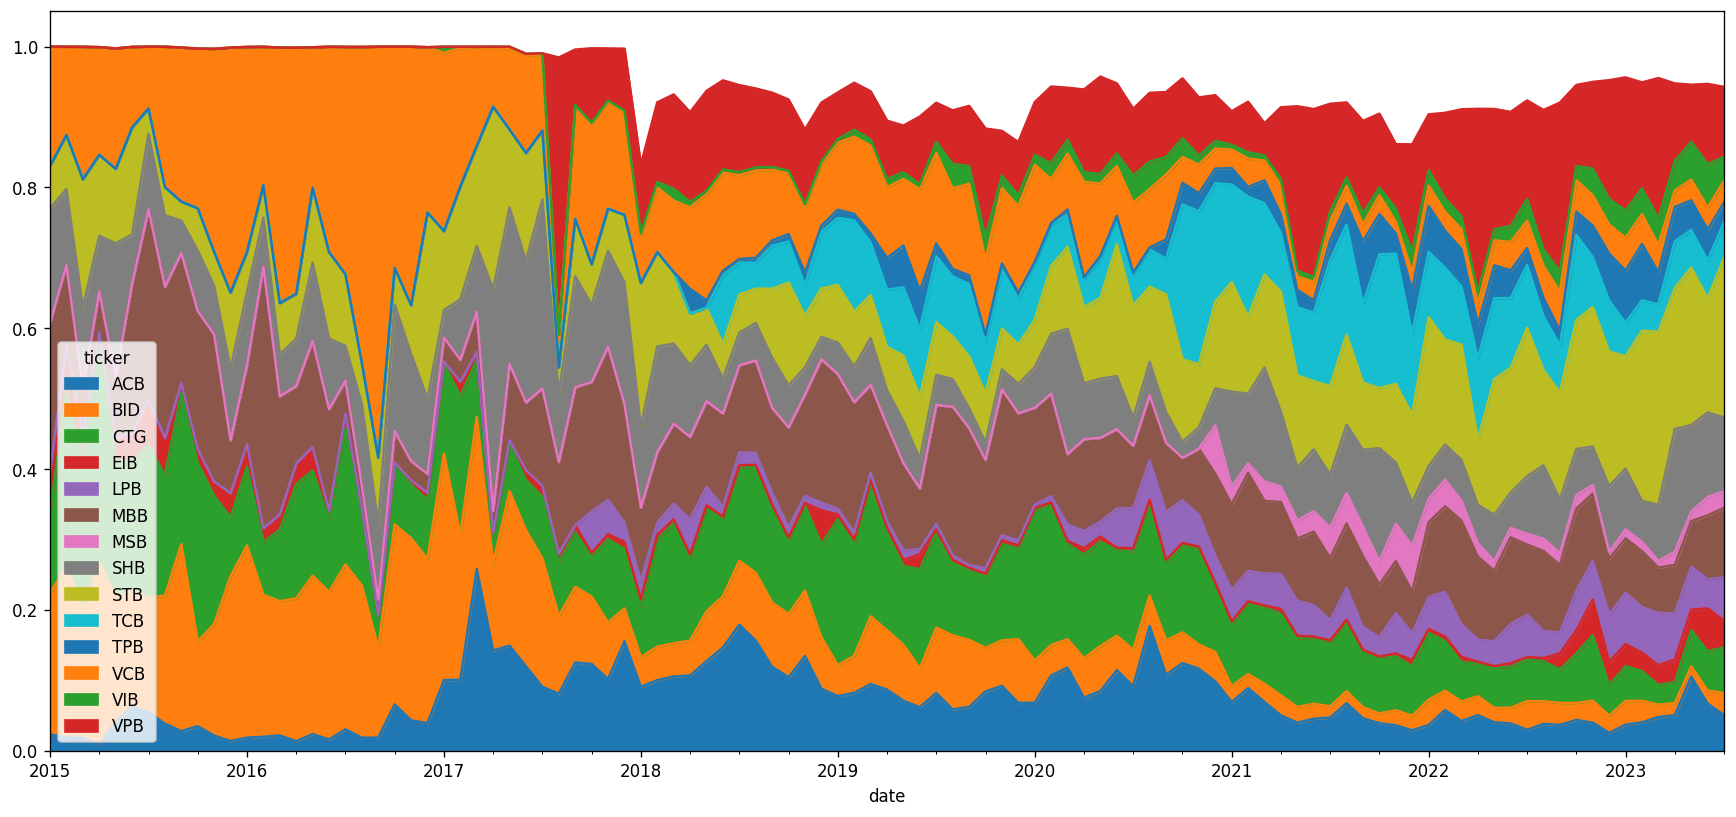

In [ ]:
#@title By Ticker

r = mf[mf.sector == sector].groupby(['ticker', 'date']).sum()
r = pd.pivot_table(r, values='value', index=['date'], columns=['ticker'], aggfunc=np.sum, fill_value=0)
r = r.div(r.sum(axis=1), axis=0)

rf= r[r.columns[r.iloc[-1] > 0.02]]
rf.plot.area();

In [ ]:
sector = "Bất động sản" # Bất động sản, Ngân hàng, Tài nguyên

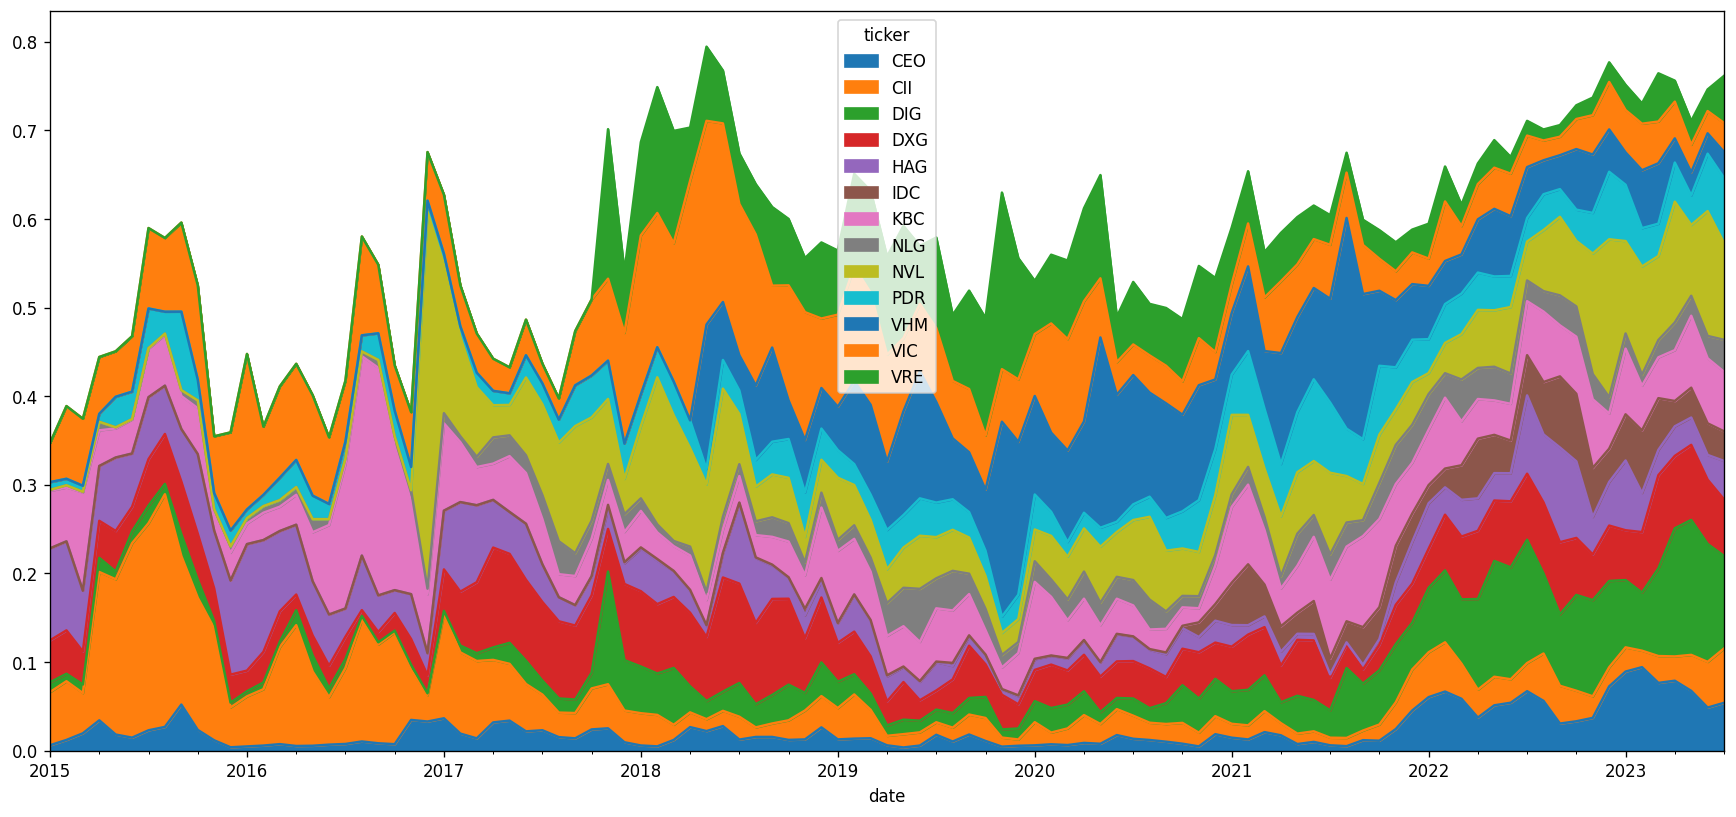

In [ ]:
#@title By Ticker

r = mf[mf.sector == sector].groupby(['ticker', 'date']).sum()
r = pd.pivot_table(r, values='value', index=['date'], columns=['ticker'], aggfunc=np.sum, fill_value=0)
r = r.div(r.sum(axis=1), axis=0)

rf= r[r.columns[r.iloc[-1] > 0.02]]
rf.plot.area();